In [1]:
pwd

'/home/wsuser/work'

In [2]:
!pip install keras==2.2.4

In [3]:
!pip install tensorflow==2.5.0

In [4]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='uIA8_1QkZYmvlQIELrM54q87VHGi7VXLAi7iuCOiNLwO',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'agesturebasedtoolforsterilebrowsi-donotdelete-pr-w8i8sw8y00zk5l'
object_key = 'dataset.zip'

streaming_body_2 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

## Unzipping the DataSet Folder

In [5]:
from io import BytesIO
import zipfile
unzip=zipfile.ZipFile(BytesIO(streaming_body_2.read()),'r')
file_paths=unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [6]:
ls -1

dataset/
Dataset/
gesture.h5
hand-gesture-model.tgz
handgesture.tar.gb
hand.h5
hand.tar.gb
model-bw.json


In [7]:
pwd

'/home/wsuser/work'

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2022-11-17 10:24:26.926733: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ibm/dsdriver/lib:/opt/oracle/lib:/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/tensorflow


In [9]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [10]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [11]:
x_train = train_datagen.flow_from_directory("/home/wsuser/work/Dataset/train",
                                            target_size=(64, 64),
                                            batch_size=3,
                                            color_mode='rgb',
                                            class_mode='categorical')

Found 594 images belonging to 6 classes.


In [12]:
x_test = test_datagen.flow_from_directory("/home/wsuser/work/Dataset/test",
                                          target_size=(64, 64),
                                          batch_size=3,
                                          color_mode='rgb',
                                          class_mode='categorical')

Found 30 images belonging to 6 classes.


In [13]:
x_train.class_indices

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5}

# Importing libraries

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

### Model Creation

In [15]:
model = Sequential()

2022-11-17 10:24:28.031650: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ibm/dsdriver/lib:/opt/oracle/lib:/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/tensorflow
2022-11-17 10:24:28.031687: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)


In [16]:
model.add(Convolution2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [17]:
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [18]:
model.add(Flatten())

In [19]:
model.add(Dense(units=512 , activation='relu'))

In [20]:
model.add(Dense(units=6, activation='softmax')) 

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               3211776   
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 3

## Model Compiling

In [22]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
len(x_train)

198

In [24]:
model.fit(x_train,
                    steps_per_epoch = len(x_train) , 
                    epochs = 25, 
                    validation_data = x_test,
                    validation_steps = len(x_test))

Epoch 1/25
198/198 [==============================] - 7s 35ms/step - loss: 1.2039 - accuracy: 0.5438 - val_loss: 0.7935 - val_accuracy: 0.7000
Epoch 2/25
198/198 [==============================] - 7s 34ms/step - loss: 0.5655 - accuracy: 0.7778 - val_loss: 0.4683 - val_accuracy: 0.8000
Epoch 3/25
198/198 [==============================] - 7s 35ms/step - loss: 0.3898 - accuracy: 0.8586 - val_loss: 0.4689 - val_accuracy: 0.9000
Epoch 4/25
198/198 [==============================] - 7s 35ms/step - loss: 0.2572 - accuracy: 0.8956 - val_loss: 0.4472 - val_accuracy: 0.8667
Epoch 5/25
198/198 [==============================] - 7s 35ms/step - loss: 0.1970 - accuracy: 0.9226 - val_loss: 0.5205 - val_accuracy: 0.9000
Epoch 6/25
198/198 [==============================] - 7s 35ms/step - loss: 0.1642 - accuracy: 0.9394 - val_loss: 0.4278 - val_accuracy: 0.9000
Epoch 7/25
198/198 [==============================] - 7s 35ms/step - loss: 0.1154 - accuracy: 0.9596 - val_loss: 0.0514 - val_accuracy: 1.0000

In [25]:
model.save('hand.h5')

ls 

# Test The Model

In [26]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [27]:
#load_the_model
model=load_model('hand.h5')

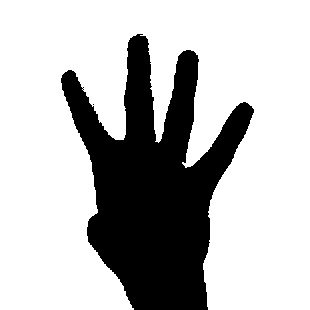

In [28]:
img=image.load_img(r"/home/wsuser/work/Dataset/test/4/1.jpg")
img

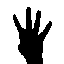

In [29]:
img=image.load_img(r"/home/wsuser/work/Dataset/test/4/1.jpg", target_size=(64,64))
img

In [30]:
x=image.img_to_array(img)

In [31]:
x=np.expand_dims(x,axis=0)

In [32]:
y=np.argmax(model.predict(x),axis=1)

In [33]:
y

array([4])

In [34]:
x_train.class_indices

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5}

In [35]:
index=['0','1','2','3','4','5']

In [36]:
index[y[0]]

'4'

In [37]:
img=image.load_img(r"/home/wsuser/work/Dataset/test/5/4.jpg", target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
x=np.argmax(model.predict(x),axis=1)
index=['0','1','2','3','4','5']
index[y[0]]

'4'

In [38]:
!tar -zcvf hand-gesture-model.tgz hand.h5

hand.h5


In [39]:
import tensorflow as tf
tf.__version__

'2.5.0'

## IBM Deployment

In [40]:
!pip install watson-machine-learning-client

In [41]:
from ibm_watson_machine_learning import APIClient
wml_credentials={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"JmljsAGRtavsQFxun8wZ3-IYeasMrcYL55NZxJKIRYZD"
}

client=APIClient(wml_credentials)

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/torch/package/_directory_reader.py:17: UserWarning: Failed to initialize NumPy: module compiled against API version 0xe but this version of numpy is 0xd (Triggered internally at  /opt/conda/conda-bld/pytorch-base_1658814980981/work/torch/csrc/utils/tensor_numpy.cpp:68.)
  _dtype_to_storage = {data_type(0).dtype: data_type for data_type in _storages}


In [42]:
client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  -------------  ------------------------
ID                                    NAME           CREATED
df95cd49-5e7c-446c-99bf-116822b51ddd  ibm_ntproject  2022-11-04T04:45:30.304Z
------------------------------------  -------------  ------------------------


In [43]:
client.set.default_space("df95cd49-5e7c-446c-99bf-116822b51ddd")

'SUCCESS'

In [44]:
client.software_specifications.list(200)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [45]:
software_space_uid=client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')

In [46]:
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [47]:
model_details=client.repository.store_model(model='hand-gesture-model.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"CNN Model Building",
    client.repository.ModelMetaNames.TYPE:'tensorflow_2.7',
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [48]:
model_id=client.repository.get_model_id(model_details)

In [49]:
model_id

'fad69e38-29a0-477f-a30f-06628e6f2aa0'

In [51]:
client.repository.download(model_id,'handgesture1.tar.gb')

Successfully saved model content to file: 'handgesture1.tar.gb'


'/home/wsuser/work/handgesture1.tar.gb'

In [53]:

# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
metadata_1 = {
    'IAM_SERVICE_ID': 'iam-ServiceId-f59c75c4-6b4d-41ce-8b4a-6f7ee3730e72',
    'IBM_API_KEY_ID': 'uIA8_1QkZYmvlQIELrM54q87VHGi7VXLAi7iuCOiNLwO',
    'ENDPOINT': 'https://s3.private.us.cloud-object-storage.appdomain.cloud',
    'IBM_AUTH_ENDPOINT': 'https://iam.cloud.ibm.com/oidc/token',
    'BUCKET': 'agesturebasedtoolforsterilebrowsi-donotdelete-pr-w8i8sw8y00zk5l',
    'FILE': 'dataset.zip'
}


In [54]:
ls -1

dataset/
Dataset/
gesture.h5
handgesture1.tar.gb
hand-gesture-model.tgz
handgesture.tar.gb
hand.h5
hand.tar.gb
model-bw.json
